In [1]:
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mlp
import matplotlib.pyplot as plt
import geopandas as gp
import seaborn as sb
import os
import re
import scipy.stats as st
%matplotlib inline
plt.style.use('ggplot')


In [30]:
sb.set_style("whitegrid")
plt.rcParams["ytick.labelsize"] = 13
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 15
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["grid.linewidth"] = 2.0
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.1
plt.rcParams["legend.frameon"] = True
plt.rcParams["legend.framealpha"]= 0.9
plt.rcParams["legend.edgecolor"] = "black"
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["figure.titlesize"] = 18
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.autolayout"] = False
pd.options.display.max_columns = 1000

In [60]:
def tryfun (f, default=None):
    def w(i):
        try:
            return f(i)
        except:
            return default
    return w

In [3]:
cwd = os.getcwd()
os.chdir("../../../core")
import GT_helper_functions as hf
import GT_load_data as data
os.chdir(cwd)

In [154]:
dataA = pd.read_excel("../../../../Outcome Measurement Data/HIV/Anexo 1_Indicadores_Resultados.xlsx", sheet_name = 1)

In [155]:
dataA.columns

Index(['Indicador ', 'Geographic Area', '¿Metas acumulativas?',
       'Reverse Indicator?', 'Linea de base', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Meta', 'Unnamed: 10', 'Unnamed: 11',
       'Comentario del MD', 'Resultado verificado y validado por el FM',
       'Unnamed: 14', 'Unnamed: 15', 'Desempeño', 'Comentario del FM',
       'Respuesta del Receptor Principal'],
      dtype='object')

In [199]:
temp = dataA[["Indicador ", "Desempeño", "Unnamed: 6"]].drop(dataA.index[dataA.Desempeño.isna()])

In [200]:
# temp["Indicador"] = temp["Indicador "].map(lambda x: x.split(":")[0])
temp["Baseline"] = temp["Unnamed: 6"]
temp["Actual"] = temp["Desempeño"]

In [203]:
temp["Indicador "].values

array(['KP-1a(M): Porcentaje de hombres que tienen relaciones sexuales con hombres cubiertos por programas de prevención del VIH (paquetes definidos de servicios)',
       'KP-3a(M): Porcentaje de hombres que tienen relaciones sexuales con hombres que se han sometido a pruebas de VIH durante el período de informe y conocen los resultados',
       'KP-1b(M): Porcentaje de personas transgénero cubiertas por programas de prevención del VIH; paquete definido de servicios',
       'KP-3b(M): Porcentaje de personas transgénero que se han sometido a pruebas de VIH durante el período de informe y conocen los resultados',
       'KP-1c(M): Porcentaje de trabajadores sexuales cubiertos por programas de prevención del VIH (paquete definido de servicios)',
       'KP-3c(M): Porcentaje de trabajadores sexuales que se han sometido a pruebas de VIH durante el período de informe y conocen los resultados',
       'KP-1e: Porcentaje de otras poblaciones vulnerables cubiertas por programas de prevención 

In [204]:
temp["Indicador"] = [
    '% of MSM covered by HIV prevention programs - KP-1a(M)',
    '% of MSM that took HIV test and know the result - KP-3a(M)',
    '% trans people covered by HIV prevention programs - KP-1b(M)',
    '% trans people that took HIV test and know the result - KP-3b(M)',
    '% sex workers covered by HIV prevention programs - KP-1c(M)',
    '% sex workers that took HIV test and know the result - KP-3c(M)',
    '% other vulnerable population covered by HIV prevention programs - KP-1e',
    '% people with HIV on ART - TCS-1(M)',
    '% people diagnosed with HIV linked to health care - TCS-7'
]

In [205]:
temp = temp[["Indicador", "Baseline", "Actual"]].set_index("Indicador").stack().reset_index() #.pivot_table(index="Indicador", values=["Baseline", "Performance"], )

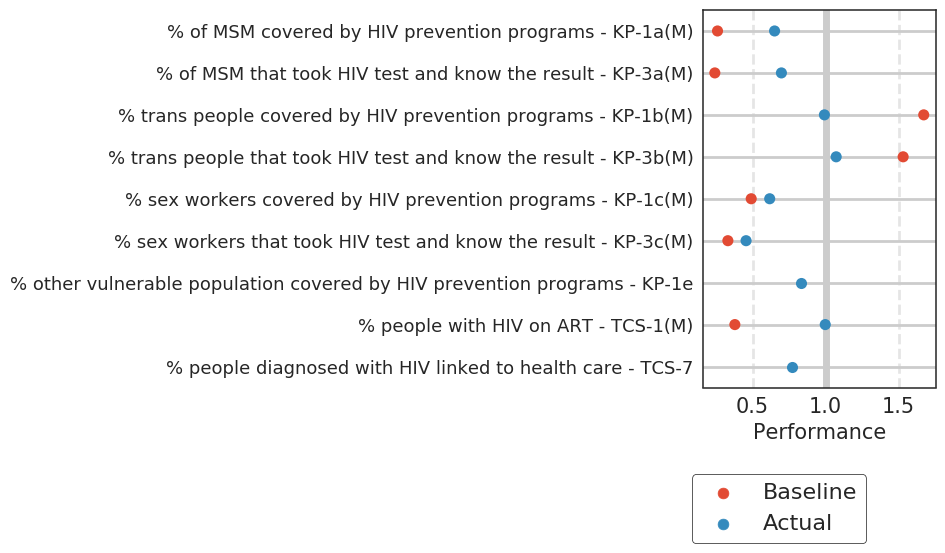

In [208]:
plt.rcParams["figure.figsize"] = (3, 5)
ax = sb.stripplot(x=0, y="Indicador", hue="level_1", data=temp.iloc[:,:], size=8, jitter=0)
ax.grid(axis="x", alpha=0.5, linestyle="--")
ax.grid(axis="y", alpha=1, )
ax.set_xlabel("Performance")
ax.set_ylabel("")
plt.axvline(x = 1, color="#cccccc", linewidth=5)
plt.legend(bbox_to_anchor=(0.75, -0.2))

In [42]:
dataB = pd.read_excel("../../../../Outcome Measurement Data/HIV/Anexo 1_Indicadores_Resultados.xlsx", sheet_name = 0)

In [68]:
dataB.columns

Index(['Impacto/Resultados', 'Indicador ', 'Linea de base\n(si corresponde)',
       'Unnamed: 3', 'Meta', 'Unnamed: 5', 'Unnamed: 6', 'Año de meta',
       'Fecha de presentación del informe',
       'Resultado verificado y validado por el FM', 'Unnamed: 10',
       'Unnamed: 11', 'Comentario FM', 'Respuesta del Receptor Principal'],
      dtype='object')

In [183]:
temp = dataB[["Indicador ", "Unnamed: 11", "Linea de base\n(si corresponde)"]][dataB["Indicador "].notna()]

In [184]:
temp["Indicador "].values # = temp["Indicador "].map(lambda x: str(x).split(":")[0])

array(['HIV I-14: Número de infecciones nuevas de VIH por 1,000 habitantes no infectados',
       'HIV I-4: Número de muertes relacionadas con SIDA por 100,000 habitantes',
       'HIV I-10(M): Porcentaje de trabajadores sexuales que viven con el VIH',
       'HIV I-9b(M): Porcentaje de personas transgénero que viven con el VIH',
       'HIV I-9a(M): Porcentaje de hombres que tienen relaciones sexuales con hombres y viven con el VIH',
       'HIV O-1(M): Porcentaje de adultos y niños con VIH que se sabe que continúan con el tratamiento 12 meses después de iniciar la terapia antirretroviral',
       'HIV O-4a(M): Porcentaje de hombres que afirman haber utilizado preservativo en su última relación de sexo anal con otro hombre',
       'HIV O-4.1b(M): Porcentaje de personas transgénero que reportan uso de condón la última vez que sostuvieron relaciones sexuales con una pareja',
       'HIV O-5(M): Porcentaje de trabajadores del sexo que reportan haber utilizado preservativo con su último 

In [185]:
indicadores = [
    'New HIV infections p/1 000 hab - HIV I-14',
    'HIV death rate p/100 000 hab - HIV I-4',
    '% sex workers with HIV - HIV I-10(M)',
    '% trans population with HIV - HIV I-9b(M)',
    '% MSM with HIV - HIV I-9a(M)',
    'Adults and children with HIV that continue ART 12 months after tx began - HIV O-1(M)',
    '% Condom use in last anal sexual encounter of men with other men - HIV O-4a(M)',
    '% Condom use in last sexual encounter of trans population - HIV O-4.1b(M)',
    '% Condom use in last sexual encounter of sex workers - HIV O-5(M)',
    '% people with HIV that experience discrimination in health services - HIV O-15',
    '% people with HIV with positive HIV test - HIV O-11',
    '% people with HIV on ART with suppressed viral load - HIV O-12'
]

In [186]:
temp["Indicador"] = indicadores

In [187]:
temp

,Indicador,Unnamed: 11,Linea de base\n(si corresponde),Indicador
1,HIV I-14: Número de infecciones nuevas de VIH ...,NaN,0.18,New HIV infections p/1 000 hab - HIV I-14
2,HIV I-4: Número de muertes relacionadas con SI...,NaN,9.76,HIV death rate p/100 000 hab - HIV I-4
3,HIV I-10(M): Porcentaje de trabajadores sexual...,0.00378788,1.9%,% sex workers with HIV - HIV I-10(M)
4,HIV I-9b(M): Porcentaje de personas transgéner...,0.030303,24.0%,% trans population with HIV - HIV I-9b(M)
5,HIV I-9a(M): Porcentaje de hombres que tienen ...,0.0852149,7.4%,% MSM with HIV - HIV I-9a(M)
6,HIV O-1(M): Porcentaje de adultos y niños con ...,0.797741,76.9%,Adults and children with HIV that continue ART...
7,HIV O-4a(M): Porcentaje de hombres que afirman...,0.554291,57.1%,% Condom use in last anal sexual encounter of ...
8,HIV O-4.1b(M): Porcentaje de personas transgén...,0.473684,73.5%,% Condom use in last sexual encounter of trans...
9,HIV O-5(M): Porcentaje de trabajadores del sex...,0.983923,97.0%,% Condom use in last sexual encounter of sex w...
10,HIV O-15: Porcentaje de personas que viven con...,NaN,7.2%,% people with HIV that experience discriminati...


In [188]:
temp["Actual"] = temp.iloc[:,1].map(tryfun(float, np.NaN))
temp["Baseline"] = temp.iloc[:,2].map(tryfun(lambda x: float(str(x).replace("%", "")), np.NaN))/100

In [189]:
temp = temp[["Indicador", "Baseline", "Actual"]].set_index("Indicador").stack().reset_index() #.pivot_table(index="Indicador", values=["Baseline", "Performance"], )

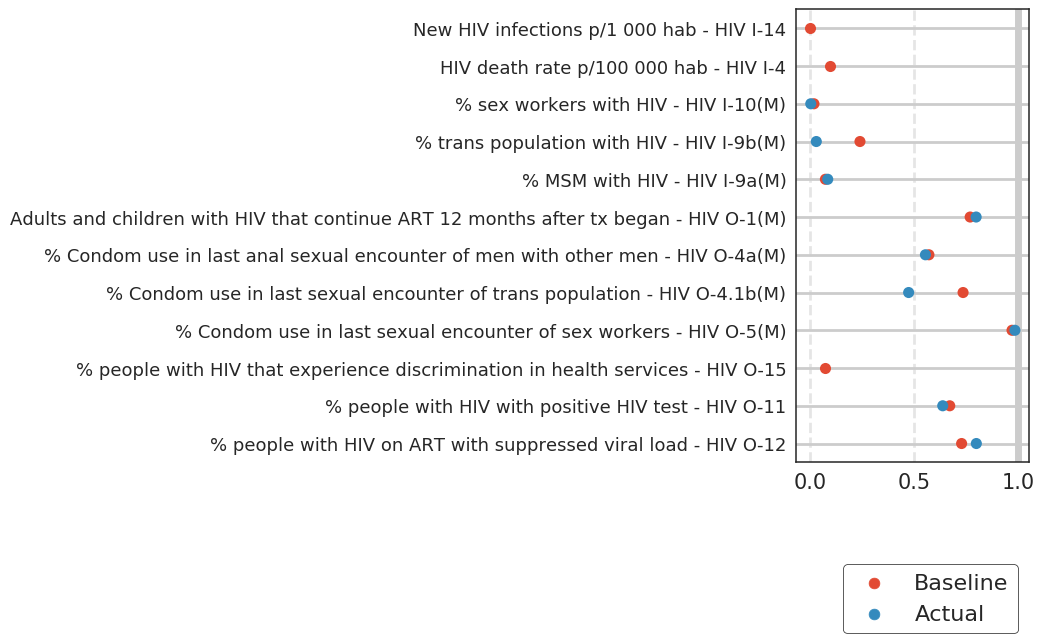

In [198]:
plt.rcParams["figure.figsize"] = (3, 6)
ax = sb.stripplot(x=0, y="Indicador", hue="level_1", data=temp.iloc[:,:], size=8, jitter=0)
ax.grid(axis="x", alpha=0.5, linestyle="--")
ax.grid(axis="y", alpha=1, )
ax.set_xlabel("")
ax.set_ylabel("")
plt.axvline(x = 1, color="#cccccc", linewidth=5)
plt.legend(bbox_to_anchor=(1, -0.2))

In [173]:
temp

,Indicador,level_1,0
0,HIV I-14,Baseline,0.001800
1,HIV I-4,Baseline,0.097600
2,HIV I-10(M),Baseline,0.019000
3,HIV I-10(M),Actual,0.003788
4,HIV I-9b(M),Baseline,0.240000
5,HIV I-9b(M),Actual,0.030303
6,HIV I-9a(M),Baseline,0.074000
7,HIV I-9a(M),Actual,0.085215
8,HIV O-1(M),Baseline,0.769000
9,HIV O-1(M),Actual,0.797741
